## This is my sandbox for testing out code and training the model to get the best vibe

I've manually created data.json and put all the presets I like best in it.
The best_frames.json is created by the script and is hopefully filled with good presets for the best frames.

In [35]:
# Train a basic model on the imported dataset 'data.json'

# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Import the dataset
data = pd.read_json('./data.json')
data2 = pd.read_json('./data2.json')

# Print the first 5 rows of the dataset
data.head()
data2.head()


,rating,params
0,7,"{'a': 6.734716534707012, 'b': 0.20063784522768..."
1,7,"{'a': 24.24513149014455, 'b': 0.22983288090211..."
2,6,"{'a': -4.866820755674933, 'b': 0.2659186585626..."
3,5,"{'a': 9.542271727200948, 'b': 0.24863220592619..."
4,7,"{'a': 9.542271727200948, 'b': 0.24863220592619..."


In [36]:
# Restructure data so that the params are in a single column

# Create the dataframe from the params column and extract the internal dict to a new dataframe
X = pd.DataFrame(data, columns=['params'])
X = pd.DataFrame(X.params.values.tolist(), index=X.index).drop(['timeCreated'], axis=1)
# Remove unwanted columns

y = pd.DataFrame(data, columns=['rating'])

# Import 2nd dataset


X2 = pd.DataFrame(data2, columns=['params'])
X2 = pd.DataFrame(X2.params.values.tolist(), index=X2.index)

y2 = pd.DataFrame(data2, columns=['rating'])

In [37]:
# Shuffle and split the dataset into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Normalise the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Scale the 2nd dataset
X2_scaled = scaler.fit_transform(X2)


In [38]:
# Train a basic neural network model using Keras


model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(24, activation='relu'))
# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model

history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data=(X_test, y_test))

# Predict the rating for the test set

y_pred = model.predict(X_test)

print(np.mean(y_pred))

print(np.mean(y_test))


Epoch 1/500
6/6 [==============================] - 1s 62ms/step - loss: 29.9433 - accuracy: 0.1008 - val_loss: 19.3711 - val_accuracy: 0.0308
Epoch 2/500
6/6 [==============================] - 0s 36ms/step - loss: 14.3693 - accuracy: 0.0271 - val_loss: 12.4571 - val_accuracy: 0.0308
Epoch 3/500
6/6 [==============================] - 0s 44ms/step - loss: 13.2205 - accuracy: 0.0194 - val_loss: 11.9247 - val_accuracy: 0.0308
Epoch 4/500
6/6 [==============================] - 0s 50ms/step - loss: 11.7453 - accuracy: 0.0194 - val_loss: 11.8146 - val_accuracy: 0.0308
Epoch 5/500
6/6 [==============================] - 0s 40ms/step - loss: 11.1332 - accuracy: 0.0194 - val_loss: 11.3539 - val_accuracy: 0.0308
Epoch 6/500
6/6 [==============================] - 0s 69ms/step - loss: 10.8844 - accuracy: 0.0194 - val_loss: 10.6335 - val_accuracy: 0.0308
Epoch 7/500
6/6 [==============================] - 0s 74ms/step - loss: 10.7527 - accuracy: 0.0194 - val_loss: 10.7157 - val_accuracy: 0.0308
Epoch 

c:\Users\mlg\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


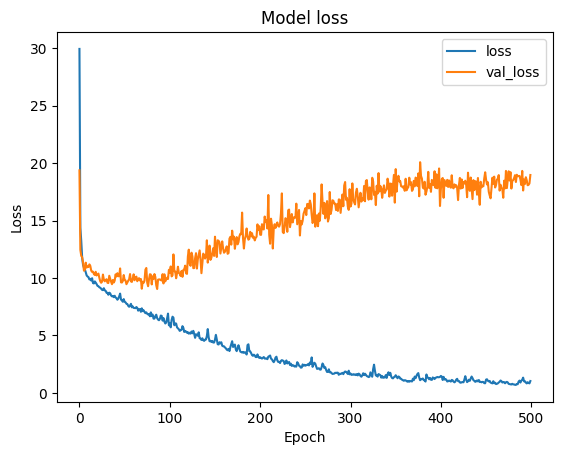

In [39]:
# Plot the loss and accuracy for the model

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
# Plot the valodation accuracy
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()


In [40]:
# Train using the 2nd dataset

X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=420)

# Train the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/1000
4/4 [==============================] - 1s 59ms/step - loss: 34.1524 - accuracy: 0.1316 - val_loss: 45.9033 - val_accuracy: 0.0789
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 32.9583 - accuracy: 0.1250 - val_loss: 44.8043 - val_accuracy: 0.0526
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 31.8994 - accuracy: 0.1184 - val_loss: 43.7806 - val_accuracy: 0.0263
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 30.8237 - accuracy: 0.1184 - val_loss: 42.8374 - val_accuracy: 0.0263
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 29.9110 - accuracy: 0.1250 - val_loss: 41.9548 - val_accuracy: 0.0263
Epoch 6/1000
4/4 [==============================] - 0s 16ms/step - loss: 29.0337 - accuracy: 0.1053 - val_loss: 41.1623 - val_accuracy: 0.0263
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 28.2016 - accuracy: 0.0987 - val_loss: 40.4405 - val_accuracy: 0.0263

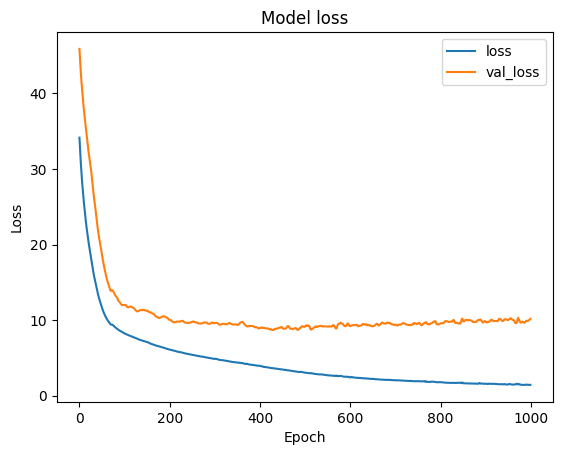

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
# Plot the valodation accuracy
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [47]:
# use the model to predict the rating for the test set

y_pred = model.predict(X_test)

# Test the accuracy of the prediction

from sklearn.metrics import mean_squared_error

print("NN: {}".format(mean_squared_error(y_test, y_pred)))




2/2 [==============================] - 0s 4ms/step
NN: 10.16580720247915


In [43]:
# Export the model to a file

model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [44]:
# Generating the best frames for the orbit visualizer

# Randomly generate 1000 frames, get the model to classify them and save the best 100 frames

import random

# Generate 10000 random frames within the ranges of the various parameters
frames = []
for i in range(10000):
		frame = []
		frame.append(random.uniform(-30, 30)) # a
		frame.append(random.uniform(0.2, 1.8)) # b
		frame.append(random.uniform(5, 17)) # c
		frame.append(random.uniform(0, 10)) # d
		frame.append(random.uniform(0, 12)) # e
		frame.append(random.uniform(0, 1)) # choice
		frame.append(random.uniform(0, 1)) # xPreset
		frame.append(random.uniform(0, 1)) # yPreset
		frames.append(frame)

# Get the model to classify the frames
frames_scaled = scaler.fit_transform(np.array(frames))

# Get the model to predict the rating for the frames
frames_pred = model.predict(frames_scaled)

# Get the best 100 frames
best_frames = []
for i in range(200):
		argMax = np.argmax(frames_pred)
		best_frames.append({"pred": argMax, "params": frames[argMax]})
		frames_pred[argMax] = -1


313/313 [==============================] - 0s 1ms/step


In [45]:
# Map the best frames to the parameters
mapped = []
for frame in best_frames:
		mapped.append({"rating": str(frame['pred']), "params": {
				"a": frame['params'][0],
				"b": frame['params'][1],
				"c": frame['params'][2],
				"d": frame['params'][3],
				"e": frame['params'][4],
				"choice": frame['params'][5],
				"xPreset": frame['params'][6],
				"yPreset": frame['params'][7],
				
		}})

# Convert the best frames to JSON and save them to a file
import json

with open('best_frames.json', 'w') as outfile:
		json.dump(mapped, outfile)

In [46]:
import tensorflowjs as tfjs

# Load the model
model = tf.keras.models.load_model('model.h5')

tfjs.converters.save_keras_model(model, 'tfjs_model')

ModuleNotFoundError: No module named 'tensorflowjs'

Now I'm going to try and train a model, giving it a rating and then see if it can predict the best presets for the best frames.
It will need to be a little bit random to not just spit out the same presets over and over again.

In [ ]:
# Create the new training set
# I'm swapping the x and y parameters to see if the model can learn to predict an output based on a rating
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=420)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
# Create a new model with a similar architecture as the original model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(24, activation='relu'))

# Output layer
model.add(Dense(8, activation='relu'))

# Compile the model

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model

history = model.fit(X_train, y_train, epochs=170, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/170
9/9 [==============================] - 1s 22ms/step - loss: 59.3500 - mean_squared_error: 59.3500 - val_loss: 52.8432 - val_mean_squared_error: 52.8432
Epoch 2/170
9/9 [==============================] - 0s 8ms/step - loss: 52.3535 - mean_squared_error: 52.3535 - val_loss: 47.7627 - val_mean_squared_error: 47.7627
Epoch 3/170
9/9 [==============================] - 0s 7ms/step - loss: 50.8718 - mean_squared_error: 50.8718 - val_loss: 49.3434 - val_mean_squared_error: 49.3434
Epoch 4/170
9/9 [==============================] - 0s 7ms/step - loss: 49.1574 - mean_squared_error: 49.1574 - val_loss: 49.0372 - val_mean_squared_error: 49.0372
Epoch 5/170
9/9 [==============================] - 0s 7ms/step - loss: 48.8228 - mean_squared_error: 48.8228 - val_loss: 47.8034 - val_mean_squared_error: 47.8034
Epoch 6/170
9/9 [==============================] - 0s 8ms/step - loss: 48.2217 - mean_squared_error: 48.2217 - val_loss: 47.4270 - val_mean_squared_error: 47.4270
Epoch 7/170
9/9 [====

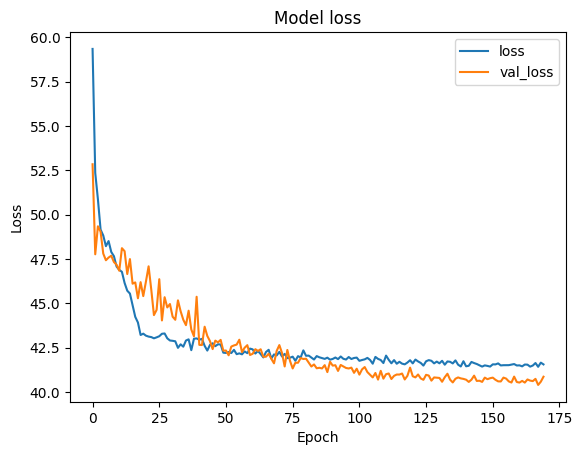

In [ ]:
plt.plot(history.history['loss'], label='loss')

plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend()
plt.show()

In [ ]:
output = model.predict([0])[0]

# map output to string
output = [x.item() for x in output]

print(output)
out = {
	"a": output[0],
	"b": output[1],
	"c": output[2],
	"d": output[3],
	"e": output[4],
	"choice": output[5],
	"xPreset": output[6],
	"yPreset": output[7],
}

# Print the out dict as a JSON string
import json

print(json.dumps(out))




1/1 [==============================] - 0s 41ms/step
[0.0, 1.0238063335418701, 10.16955280303955, 4.41685676574707, 5.128604888916016, 0.3802579343318939, 0.33457574248313904, 0.48978352546691895]
{"a": 0.0, "b": 1.0238063335418701, "c": 10.16955280303955, "d": 4.41685676574707, "e": 5.128604888916016, "choice": 0.3802579343318939, "xPreset": 0.33457574248313904, "yPreset": 0.48978352546691895}
